Generation 1: Best fitness = 40
Generation 2: Best fitness = 40
Generation 3: Best fitness = 40
Generation 4: Best fitness = 41
Generation 5: Best fitness = 49
Generation 6: Best fitness = 45
Generation 7: Best fitness = 41
Generation 8: Best fitness = 39
Generation 9: Best fitness = 46
Generation 10: Best fitness = 44
Generation 11: Best fitness = 41
Generation 12: Best fitness = 41
Generation 13: Best fitness = 43
Generation 14: Best fitness = 39
Generation 15: Best fitness = 42
Generation 16: Best fitness = 36
Generation 17: Best fitness = 40
Generation 18: Best fitness = 45
Generation 19: Best fitness = 41
Generation 20: Best fitness = 41
Generation 21: Best fitness = 45
Generation 22: Best fitness = 42
Generation 23: Best fitness = 41
Generation 24: Best fitness = 42
Generation 25: Best fitness = 40
Generation 26: Best fitness = 45
Generation 27: Best fitness = 38
Generation 28: Best fitness = 39
Generation 29: Best fitness = 40
Generation 30: Best fitness = 40
Generation 31: Best

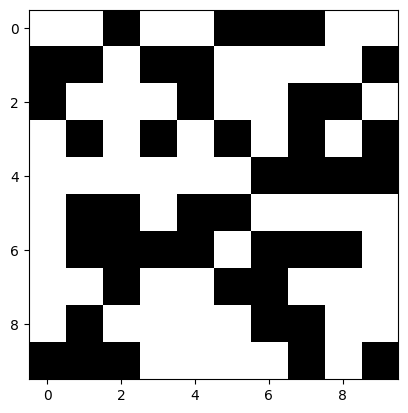

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
grid_size = 10
population_size = 100
generations = 100
mutation_rate = 0.1
tournament_size = 5
time_steps = 10

# Game of Life rules
def game_of_life_step(grid):
    neighs = np.zeros_like(grid)
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx != 0 or dy != 0:
                neighs += np.roll(np.roll(grid, dx, axis=0), dy, axis=1)
    new_grid = np.where(grid == 1, np.where(np.isin(neighs, [2, 3]), 1, 0), np.where(neighs == 3, 1, 0))
    return new_grid

# Fitness function
def fitness(pattern):
    grid = np.zeros((grid_size, grid_size))
    grid[:pattern.shape[0], :pattern.shape[1]] = pattern
    for _ in range(time_steps):
        grid = game_of_life_step(grid)
    return np.sum(grid)

# Crossover
def crossover(parent1, parent2):
    cut_point = random.randint(1, min(parent1.shape[1], parent2.shape[1]) - 1)
    child1 = np.hstack((parent1[:, :cut_point], parent2[:, cut_point:]))
    child2 = np.hstack((parent2[:, :cut_point], parent1[:, cut_point:]))
    return child1, child2

# Mutation
def mutate(pattern):
    mutation_indices = np.random.rand(*pattern.shape) < mutation_rate
    mutated_pattern = np.where(mutation_indices, 1 - pattern, pattern)
    return mutated_pattern

# Tournament selection
def tournament_selection(population, fitness_values):
    tournament_indices = random.sample(range(population_size), tournament_size)
    best_index = max(tournament_indices, key=lambda i: fitness_values[i])
    return population[best_index]

# Initialize population
population = [np.random.randint(0, 2, (grid_size, grid_size)) for _ in range(population_size)]

# Evolution loop
for gen in range(generations):
    fitness_values = [fitness(p) for p in population]

    # Print generation information
    print(f"Generation {gen + 1}: Best fitness = {max(fitness_values)}")

    new_population = []
    for _ in range(population_size // 2):
        parent1 = tournament_selection(population, fitness_values)
        parent2 = tournament_selection(population, fitness_values)

        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)

        new_population.extend([child1, child2])

    population = new_population

# Plot the best pattern
best_pattern = max(population, key=fitness)
plt.imshow(best_pattern, cmap="binary")
plt.show()